---
Traffic Volume Forecasting using LSTM - Jupyter Notebook Documentation
---
This Jupyter Notebook provides a step-by-step implementation of a Multivariate LSTM model for Traffic Volume Forecasting. The purpose of this project is to predict the traffic volume in a city based on various features, including temperature, hour of the day, cloud cover, and snowfall.

# Data Preparation
First, we need to load and preprocess the dataset.

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data (replace 'Traffic_Volume.csv' with your dataset path)
data = pd.read_csv('Traffic_Volume.csv')

# Convert date_time column to datetime type
data['date_time'] = pd.to_datetime(data['date_time'])

# Sort by date_time in ascending order
data = data.sort_values('date_time')

# Extract the hour from the date_time column
data['hour'] = data['date_time'].dt.hour

# Variables for training (update with the relevant columns for your dataset)
cols = ['temp', 'hour']
target_col = 'traffic_volume'

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['holiday', 'weather_main', 'weather_description'])

# New dataframe with only training data - selected columns
df_for_training = data[cols + [target_col]].astype(float)

# Normalize the dataset
scaler = MinMaxScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

# Separate features and target
X = df_for_training_scaled[:, :-1]
y = df_for_training_scaled[:, -1]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM Model
Next, we will build the LSTM model for traffic volume forecasting.

In [38]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17152     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


# Training the LSTM Model
Now, we will train the LSTM model on the training data.

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
604/604 [==============================] - 4s 4ms/step - loss: 0.0750 - val_loss: 0.0629
Epoch 2/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0560 - val_loss: 0.0423
Epoch 3/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0303 - val_loss: 0.0270
Epoch 4/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0267 - val_loss: 0.0267
Epoch 5/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0263 - val_loss: 0.0262
Epoch 6/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0261 - val_loss: 0.0260
Epoch 7/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0259 - val_loss: 0.0256
Epoch 8/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 9/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0255 - val_loss: 0.0255
Epoch 10/50
604/604 [==============================] - 2s 3ms/step - loss: 0.0254 - val_loss: 0.0252

# Making Predictions
With the trained model, we can make predictions on the training and testing sets.

In [40]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_train_pred = scaler.inverse_transform(np.concatenate((X_train.reshape(-1, X_train.shape[2]), y_train_pred), axis=1))[:, -1]
y_test_pred = scaler.inverse_transform(np.concatenate((X_test.reshape(-1, X_test.shape[2]), y_test_pred), axis=1))[:, -1]

302/302 [==============================] - 0s 2ms/step


# Evaluating the Model
Let's evaluate the performance of the model using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train R2:", train_r2)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)

Train MSE: 13204890.675116412
Train RMSE: 3633.853419596945
Train MAE: 3238.597652493433
Train R2: -177129051.67220092
Test MSE: 13332215.432023358
Test RMSE: 3651.3306385512883
Test MAE: 3264.960003575956
Test R2: -179364861.74342167


# Visualizing the Results
Finally, we will visualize the training and testing data, along with the model predictions.

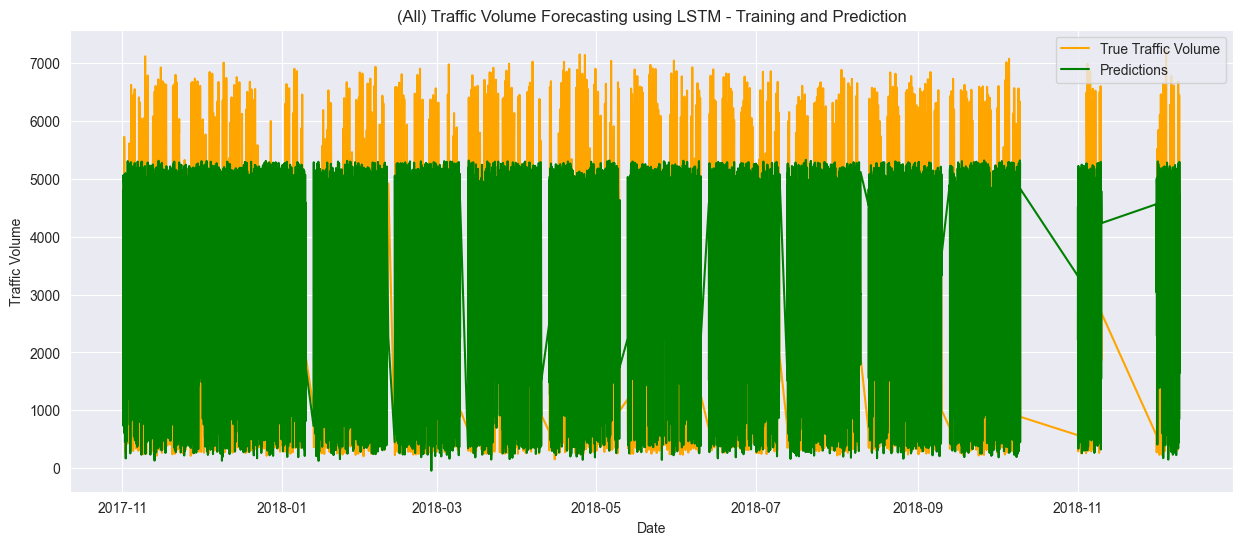

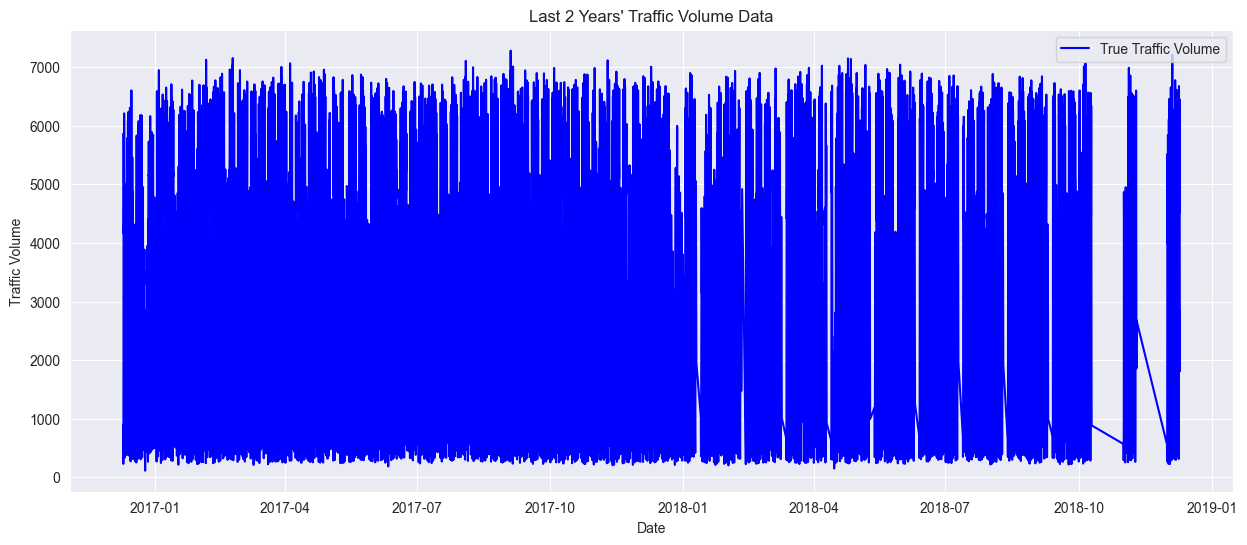

In [42]:
# Plot the training data and predictions
plt.figure(figsize=(15, 6))  # Increase the figure width

# Training and prediction plot
# plt.plot(data['date_time'][:-len(X_test)], data['traffic_volume'][:-len(X_test)], label='Training Data', color='blue')
# plt.plot(data['date_time'][-len(X_test):], y_test_pred, label='Predictions', color='green')
plt.plot(data['date_time'][-len(X_test):], data['traffic_volume'][-len(X_test):], label='True Traffic Volume', color='orange')
plt.plot(data['date_time'][-len(X_test):], y_test_pred, label='Predictions', color='green')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('(All) Traffic Volume Forecasting using LSTM - Training and Prediction')
plt.legend()

# Save the plot as an image
# plt.savefig('All_traffic_volume_forecast_training_prediction_lstm.png')

plt.show()

# Plot the last 2 years' data
plt.figure(figsize=(15, 6))  # Increase the figure width

# Get the start date for the last 2 years
start_date = data['date_time'].max() - pd.DateOffset(years=2)

# Filter the data for the last 2 years
last_2_years_data = data[data['date_time'] >= start_date]

# Last 2 years' data plot
plt.plot(last_2_years_data['date_time'], last_2_years_data['traffic_volume'], label='True Traffic Volume', color='blue')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Last 2 Years\' Traffic Volume Data')
plt.legend()

# Save the plot as an image
# plt.savefig('last_2_years_traffic_volume_lstm.png')

plt.show()

# Conclusion
In this Jupyter Notebook, we implemented a Multivariate LSTM model for Traffic Volume Forecasting based on Deep Learning. The model was trained and evaluated on the dataset, and the results were visualized for analysis. By using the LSTM model, we can predict traffic volume based on various features, providing valuable insights for traffic management and planning.

# Correlation Matrix for Top 5 Features
During the Exploratory Data Analysis (EDA) phase, the correlation matrix for the top 5 features was computed, and the results are as follows:

- `temp-hour`: 0.11
- `temp-traffic_volume`: 0.13
- `clouds_all-traffic_volume`: 0.067
- `clouds_all-hour`: 0.054
- `clouds_all-snow_1h`: 0.028
These correlations provide insights into the relationships between these features and the traffic volume, aiding in the understanding of how different factors influence traffic patterns.